In [7]:
# Add RossmannSalesPrediction to path
import sys
import pathlib
sys.path.append(str(pathlib.Path(".").resolve().parent))


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from helpers.dataprep import fix_df


root_path = "../"

In [8]:
store = pd.read_csv(root_path + 'data/store.csv')
train = pd.read_csv(root_path + 'data/train.csv')

train = fix_df(train)

/home/moritz_wilksch/miniconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# `train.csv`
(After fixing it)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   store          1017209 non-null  int64         
 1   dayofweek      1017209 non-null  int64         
 2   date           1017209 non-null  datetime64[ns]
 3   sales          1017209 non-null  int64         
 4   customers      1017209 non-null  int64         
 5   open           1017209 non-null  int64         
 6   promo          1017209 non-null  int64         
 7   stateholiday   1017209 non-null  category      
 8   schoolholiday  1017209 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(7)
memory usage: 63.1 MB


In [10]:
train.head()

,store,dayofweek,date,sales,customers,open,promo,stateholiday,schoolholiday
0,1,5,2015-07-31,5263,555,1,1,no,1
1,2,5,2015-07-31,6064,625,1,1,no,1
2,3,5,2015-07-31,8314,821,1,1,no,1
3,4,5,2015-07-31,13995,1498,1,1,no,1
4,5,5,2015-07-31,4822,559,1,1,no,1


In [11]:
train.describe().round(2)

,store,dayofweek,sales,customers,open,promo,schoolholiday
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.18
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.38
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,1.00


In [12]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(train, title="Pandas Profiling Report")


In [13]:
# profile.to_file(root_path + "profile_report.html")

Text(0.5, 1.0, 'Mean Sales per Store')

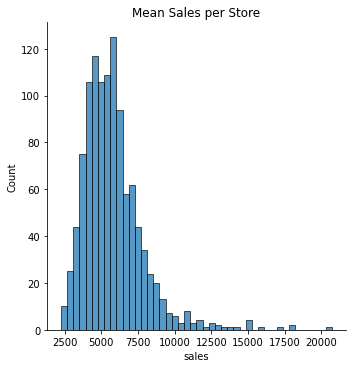

In [15]:
sns.displot(train.groupby('store')['sales'].mean())
plt.title("Mean Sales per Store")

Text(0.5, 1.0, 'Sales over Time (since Jan 2014)')

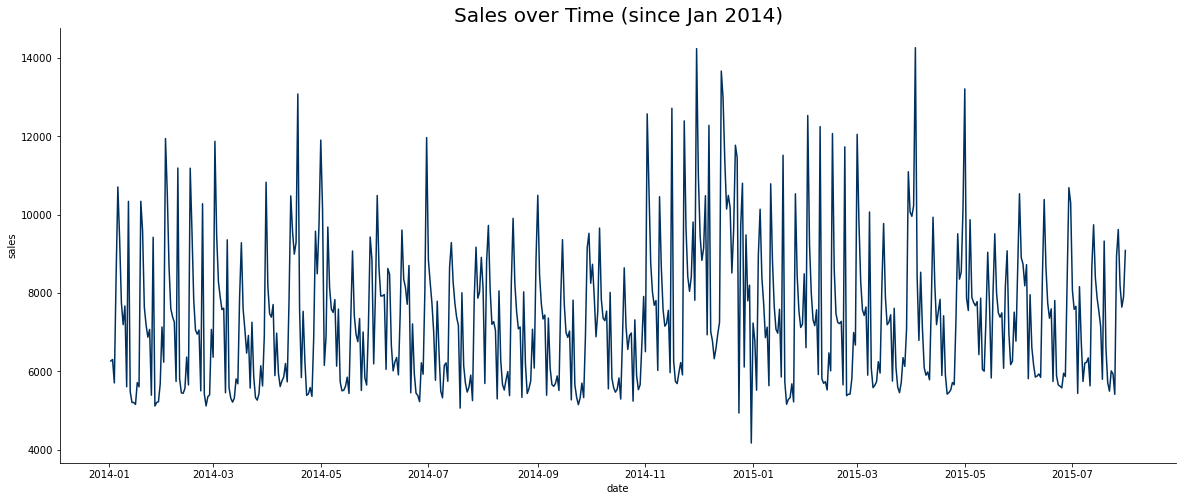

In [25]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(data=train.query("sales>0 and date>'2014-01-01'").groupby('date')['sales'].mean(), ax=ax, color='#00305e')
sns.despine()
plt.title("Sales over Time (since Jan 2014)", size=20)